In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/Othercomputers/Il mio laptop/RL

Mounted at /content/drive
/content/drive/Othercomputers/Il mio laptop/RL


In [2]:
from RL_cliff.actions import *
from RL_cliff.environment import *
from RL_cliff.plot import plot_steps, plot_rewards
from RL_cliff.learning_algorithm import discrete_policy_gradient, discrete_SCRN
import pickle
from multiprocessing import Pool

import numpy as np
# import modules
from matplotlib import pyplot as plt

In [14]:
algorithms = ["discrete_policy_gradient", "discrete_SCRN"]
results = {"discrete_policy_gradient": {}, "discrete_SCRN": {}}
num_avg = 10

class sim_init_class:
        def __init__(self, num_episodes, gamma, alpha, epsilon, SGD, period):
            self.num_episodes = num_episodes  # Number of training episodes
            self.gamma = gamma  # Discount rate γ 0.9
            self.alpha = alpha  # Learning rate α 0.001
            self.epsilon = epsilon  # Exploration rate ε
            self.SGD = SGD
            self.l = 10
            self.rho = 30
            self.eps = 10**-3
            self.c_ = 1
            self.T_eps = 10
            self.batch_size = 1
            self.period = period

class sim_output_class:
      def __init__(self, rewards_cache, step_cache, env_cache, name_cache, std_alg_reward, std_alg_step):
            self.reward_cache = rewards_cache  # list of rewards
            self.step_cache = step_cache  # list of steps
            self.env_cache = env_cache  # list of final paths
            self.name_cache = name_cache  # list of algorithm names
            self.std_alg_reward = std_alg_reward
            self.std_alg_step = std_alg_step

for i in range(num_avg):
  print(f"====== Doing {i} training run out of {num_avg} ==========")
  for ind, algo in enumerate(algorithms):
    print(f"========= Training with {algo} ============= ")
    sim_input = sim_init_class(num_episodes=5000, gamma=0.8, alpha=0.001, SGD=0, epsilon=0, period=5000)
    sim_output = sim_output_class(rewards_cache=[], step_cache=[], env_cache=[], name_cache=[], std_alg_reward=[], std_alg_step=[])
    all_probs, sim_output, temp_goal = eval(algo)(sim_input, sim_output)
    results[algo].update({i : sim_output.step_cache[0]})

Output streaming troncato alle ultime 5000 righe.
===== Goal reached (episode 2497 ) =====
2498 : 21.0
===== Goal reached (episode 2498 ) =====
2499 : 19.0
===== Goal reached (episode 2499 ) =====
2500 : 20.0
===== Goal reached (episode 2500 ) =====
2501 : 19.0
===== Goal reached (episode 2501 ) =====
2502 : 19.0
===== Goal reached (episode 2502 ) =====
2503 : 19.0
===== Goal reached (episode 2503 ) =====
2504 : 19.0
===== Goal reached (episode 2504 ) =====
2505 : 19.0
===== Goal reached (episode 2505 ) =====
2506 : 19.0
===== Goal reached (episode 2506 ) =====
2507 : 19.0
===== Goal reached (episode 2507 ) =====
2508 : 19.0
===== Goal reached (episode 2508 ) =====
2509 : 19.0
===== Goal reached (episode 2509 ) =====
2510 : 19.0
===== Goal reached (episode 2510 ) =====
2511 : 20.0
===== Goal reached (episode 2511 ) =====
2512 : 19.0
===== Goal reached (episode 2512 ) =====
2513 : 19.0
===== Goal reached (episode 2513 ) =====
2514 : 20.0
===== Goal reached (episode 2514 ) =====
2515 : 1

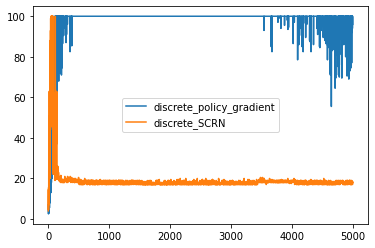

In [15]:
for ind, algo in enumerate(algorithms):
  plt.plot(np.median([results[algo][i] for i in range(num_avg)], axis=0), label=f"{algo}")
  plt.legend(loc="best")

In [9]:
#@title Policy convergence for SCRN

def encode_action(action):
  if action == 0:
    return "up"
  elif action == 1:
    return "down"
  elif action == 2:
    return "left"
  else:
    return "right"

for i in range(all_probs.shape[0]):
  print(f"State {i}: highest probability action is {encode_action(np.argmax(all_probs[i, :]))}")

State 0: highest probability action is down
State 1: highest probability action is right
State 2: highest probability action is up
State 3: highest probability action is right
State 4: highest probability action is right
State 5: highest probability action is right
State 6: highest probability action is down
State 7: highest probability action is left
State 8: highest probability action is up
State 9: highest probability action is up
State 10: highest probability action is left
State 11: highest probability action is up
State 12: highest probability action is right
State 13: highest probability action is right
State 14: highest probability action is right
State 15: highest probability action is right
State 16: highest probability action is up
State 17: highest probability action is left
State 18: highest probability action is right
State 19: highest probability action is down
State 20: highest probability action is right
State 21: highest probability action is left
State 22: highest pr